# Working with Dates and Time in Pyhton

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import timedelta

<hr>

## Chapter 1: Dates and Calendars

In [66]:
bike = pd.read_csv("databases/capital-onebike.csv")

In [67]:
from datetime import date

#First year, then month, then day (from largest to smallest)
two_hurricanes_dates = [date(2016, 10, 7), date(2017, 6, 21)]
two_hurricanes_dates

[datetime.date(2016, 10, 7), datetime.date(2017, 6, 21)]

To access individual components of a date

In [68]:
two_hurricanes_dates = [date(2016, 10, 7), date(2017, 6, 21)]

print(two_hurricanes_dates[0].year)
print(two_hurricanes_dates[0].month)
print(two_hurricanes_dates[0].day)

2016
10
7


Finding the weekday of a date

In [69]:
print(two_hurricanes_dates[0].weekday())

# 0 = Monday, 6 = Sunday

4


### Math with dates

In [70]:
from datetime import date

d1 = date(2017, 11, 5)
d2 = date(2017, 12, 4)
l = [d1, d2]

print(min(l))

2017-11-05


In [71]:
delta = d2-d1

#To obtain the number of days between two dates
print(delta.days)

29


In [72]:
from datetime import timedelta

td = timedelta(days=29)
print(d1+td)

2017-12-04


### Turning dates into strings

In [73]:
d = date(2017, 11, 5)
# ISO format: YYYY-MM-DD
print(d)

2017-11-05


In [74]:
#Express the date in ISO 8601 format and put it in a list
print( [d.isoformat()] )

['2017-11-05']


In [75]:
some_dates = ['2000-01-01', '1992-12-31']
print(sorted(some_dates))

['1992-12-31', '2000-01-01']


Everu other format - `d.strftime()`

In [76]:
d = date(2017, 1, 5)

print(d.strftime("%Y"))
print(d.strftime("%Y/%m/%d"))

2017
2017/01/05


Task 1

In [77]:
# Assign the earliest date to first_date
first_date = date(1950, 8, 10)

# Convert to ISO and US formats
iso = "Our earliest hurricane date: " + first_date.isoformat()
us = "Our earliest hurricane date: " + first_date.strftime("%m/%d/%Y")

print("ISO: " + iso)
print("US: " + us)

ISO: Our earliest hurricane date: 1950-08-10
US: Our earliest hurricane date: 08/10/1950


Task 2

In [78]:
# Create a date object
date1 = date(1992, 8, 26)
# Print the date in the format 'YYYY-MM'
print(date1.strftime("%Y-%m"))


# Print the date in the format 'MONTH (YYYY)'
print(date1.strftime("%B (%Y)"))


# Print the date in the format 'YYYY-DDD'
print(date1.strftime("%Y-%j"))

1992-08
August (1992)
1992-239


<hr>

## Chapter 2: Combining Dates and Times

In the previous chapter we used `from datetime import date`, however now we are going to use `from datetime import datetime`, which will allow us to not only specify the date, but also the time 

In [79]:
from datetime import datetime 

dt = datetime(2017, 10, 1, 15, 23, 25)
print(dt)

2017-10-01 15:23:25


or you can use named arguments

In [80]:
dt = datetime(year=2017, month=10, day=1,
              hour=15, minute=23, second=25)
print(dt)

2017-10-01 15:23:25


Replacing parts of a datetime

In [81]:
print(f"Old: {dt}")

dt_hr = dt.replace(minute=0, second=0)
print(f"New: {dt_hr}")

Old: 2017-10-01 15:23:25
New: 2017-10-01 15:00:00


### `strftime` and `strptime`

**printing and parsing datetimes**

In [82]:
dt = datetime(2017, 12, 30, 15, 19, 13)
print(dt.strftime("%Y-%m-%d"))

print(dt.strftime("%Y-%m-%d %H:%M:%S"))

print(dt.strftime("%H:%M:%S on %Y/%m/%d"))

print(dt.isoformat()) #standartized option

2017-12-30
2017-12-30 15:19:13
15:19:13 on 2017/12/30
2017-12-30T15:19:13


In the cell above all our dates are stored as str

**parsing datetime with `strptime` (string parse time)**

In [83]:
#The first argument is the string to turn into the datetime
#Second argument is the format string that says how to do it
dt = datetime.strptime("12/30/2017 15:19:13",
                       "%m/%d/%Y %H:%M:%S")
print(type(dt))
print(dt)

<class 'datetime.datetime'>
2017-12-30 15:19:13


**Summary - `strftime` converts a datetime object to a string, while `strptime` converts a string to a datetime object**

timestamp (number of seconds from 1970...)

In [84]:
#A timestamp
ts = 1514665153.0

#Convert to datetime and print
print(datetime.fromtimestamp(ts))

2017-12-30 23:19:13


<table>
<tbody>
    <tr>
        <td>%Y</td>
        <td>4 digit year (0000-9999)</td>
    </tr>
    <tr>
        <td>%m</td>
        <td>3 digit month (1-12)</td>
    </tr>
    <tr>
        <td>%d</td>
        <td>2 digit day (1-31)</td>
    </tr>
    <tr>
        <td>%H</td>
        <td>2 digit hour (0-23)</td>
    </tr>
    <tr>
        <td>%M</td>
        <td>2 digit minute (0-59)</td>
    </tr>
    <tr>
        <td>%S</td>
        <td>2 digit second (0-59)</td>
    </tr>
</tbody>

Task 1

In [85]:
# Import the datetime class
from datetime import datetime

# Starting string, in MM/DD/YYYY HH:MM:SS format
s = '12/15/1986 08:00:00'

# Write a format string to parse s
fmt = '%m/%d/%Y %H:%M:%S'

# Create a datetime object d
d = datetime.strptime(s, fmt)

# Print d
print(d)

1986-12-15 08:00:00


Task 2

In [86]:
# Import datetime
from datetime import datetime

# Starting timestamps
timestamps = [1514665153, 1514664543]

# Datetime objects
dts = []

# Loop
for ts in timestamps:
  dts.append(datetime.fromtimestamp(ts))
  
# Print results
print(dts)

[datetime.datetime(2017, 12, 30, 23, 19, 13), datetime.datetime(2017, 12, 30, 23, 9, 3)]


### Working with durations

In [87]:
start = datetime(2017, 10, 8, 23, 46, 47)
end = datetime(2017, 10, 9, 0, 10, 57)

duration = end - start
#Getting total seconds
print(duration.total_seconds())

1450.0


In [88]:
from datetime import timedelta

delta1 = timedelta(seconds=1)
print(start)
#One second later
print(start+delta1)

2017-10-08 23:46:47
2017-10-08 23:46:48


In [89]:
delta1 = timedelta(days=1, seconds=1)
print(start)
#One day and one second later
print(start+delta1)

2017-10-08 23:46:47


2017-10-09 23:46:48


<hr>

## Chapter 3: Time zones and Daylight Saving 

### UTC offsets

In [90]:
from datetime import datetime, timedelta, timezone

#US Eastern Standard time zone
ET = timezone(timedelta(hours=-5))

#Timezone-aware datetime
dt = datetime(2017, 12, 30, 15, 9, 3, tzinfo=ET)
print(dt)

2017-12-30 15:09:03-05:00


Now, in the output above we can see that the datetime incudes UTC offset

In [91]:
#India Standard time zone
IST = timezone(timedelta(hours=5, minutes=30))

#Convert to IST
print(dt.astimezone(IST))

2017-12-31 01:39:03+05:30


This is another approach to add tzinfo

In [92]:
print(dt.replace(tzinfo=timezone.utc))

2017-12-30 15:09:03+00:00


The thing is that when we use **`dt.replace` we only change offset**, however when we use **`.astimezone` we change both offset and actual time**

Task 1

In [93]:
# Import datetime, timedelta, timezone
from datetime import datetime, timedelta, timezone

# Create a timezone for Australian Eastern Daylight Time, or UTC+11
aedt = timezone(timedelta(hours=11))

# October 1, 2017 at 15:26:26, UTC+1
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=aedt)

# Print results
print(dt.isoformat())

2017-10-01T15:26:26+11:00


In [94]:
#To set utc time:
dt = dt.astimezone(timezone.utc)
print(dt)

2017-10-01 04:26:26+00:00


### Time zone database

In [95]:
from datetime import datetime 
from dateutil import tz

# Eastern time
et = tz.gettz("America/New_York") #Continent/Nearest Major City
print(et)

tzfile('America/New_York')


No we can pass in this tz of the USA

In [96]:
#Notice the different change in the UTC depending on the time of the year

last = datetime(2017, 12, 30, 15, 19, 3, tzinfo=et)
print(last)

first = datetime(2017, 10, 1, 15, 23, 25, tzinfo=et)
print(first)

2017-12-30 15:19:03-05:00
2017-10-01 15:23:25-04:00


### Starting Daylight Saving Time

In [97]:
spring_ahead_159am = datetime(2017, 3, 12, 1, 59, 59)
spring_ahead_159am.isoformat()

'2017-03-12T01:59:59'

In [98]:
spring_ahead_3am = datetime(2017, 3, 12, 3, 0, 0)
spring_ahead_3am.isoformat()

'2017-03-12T03:00:00'

In [99]:
(spring_ahead_3am - spring_ahead_159am).total_seconds()

3601.0

However the output above is wrong as it should be only 1 seconds due to changing the clocks one hour forward at that time

In [100]:
from datetime import timezone, timedelta

EST = timezone(timedelta(hours=-5))
EDT = timezone(timedelta(hours=-4))

In [101]:
spring_ahead_159am = spring_ahead_159am.replace(tzinfo=EST)
print(spring_ahead_159am.isoformat())

spring_ahead_3am = spring_ahead_3am.replace(tzinfo=EDT)
print(spring_ahead_3am.isoformat())

2017-03-12T01:59:59-05:00
2017-03-12T03:00:00-04:00


In [102]:
(spring_ahead_3am - spring_ahead_159am).total_seconds()

1.0

And now we got the correct answer by setting the correct difference between local and UTC time

Another way to avoid dealing with this issue is to use tz from the start

In [103]:
from dateutil import tz

eastern = tz.gettz("America/New_York")

spring_ahead_159am = datetime(2017, 3, 12, 1, 59, 59,
                              tzinfo = eastern)

spring_ahead_3am = datetime(2017, 3, 12, 3, 0, 0,
                            tzinfo = eastern)

Task 1

In [104]:
# Import datetime, timedelta, tz, timezone
from datetime import datetime, timedelta, timezone
from dateutil import tz

# Start on March 12, 2017, midnight, then add 6 hours
start = datetime(2017, 3, 12, tzinfo = tz.gettz('America/New_York'))
end = start + timedelta(hours=6)
print(start.isoformat() + " to " + end.isoformat())

# How many hours have elapsed?
print((end - start).total_seconds()/(60*60))

# What if we move to UTC?
print((end.astimezone(timezone.utc) - start.astimezone(timezone.utc))\
      .total_seconds()/(60*60))

2017-03-12T00:00:00-05:00 to 2017-03-12T06:00:00-04:00
6.0
5.0


### Ending Daylight Saving Time

In [105]:
eastern = tz.gettz("US/Eastern")

first_1am = datetime(2017, 11, 5, 1, 0, 0,
                     tzinfo = eastern)
tz.datetime_ambiguous(first_1am)

True

We see that this time is indeed ambiguous as it could occur at two differenct UTC times

In [106]:
eastern = tz.gettz("US/Eastern")

second_1am = datetime(2017, 11, 5, 1, 0, 0,
                     tzinfo = eastern)
second_1am = tz.enfold(second_1am)

In [107]:
(first_1am - second_1am).total_seconds()

0.0

In [108]:
first_1am = first_1am.astimezone(tz.UTC)
second_1am = second_1am.astimezone(tz.UTC)

(second_1am - first_1am).total_seconds()
#1 hour apart

3600.0

Overall when we are unsure about some dates and times the best approach is to convert them to UTC

<hr>

## Chapter 4: Dates and Times in Pandas

### Reading date and time data in Pandas

In [109]:
import pandas as pd

#if we want pandas to treat some columns as datetimes
rides = pd.read_csv("databases/capital-onebike.csv",
                    parse_dates = ["Start date", "End date"])
rides.head(3)

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member


In [110]:
#can get a particular row (number 2)
rides.iloc[2]

Start date                               2017-10-02 06:37:10
End date                                 2017-10-02 06:42:53
Start station number                                   31036
Start station                  George Mason Dr & Wilson Blvd
End station number                                     31037
End station             Ballston Metro / N Stuart & 9th St N
Bike number                                           W20529
Member type                                           Member
Name: 2, dtype: object

In case you want to specify the format of a datetime manually you should use `pd.to_datetime()`

In [111]:
rides["Start date"] = pd.to_datetime(rides["Start date"],
                                    format = "%Y-%m-%d %H:%M:%S")

In [112]:
rides["Start date"].iloc[2]

Timestamp('2017-10-02 06:37:10')

In [113]:
rides["Duration"] = rides["End date"] - rides["Start date"]

print(rides["Duration"].head())

0   0 days 00:03:01
1   0 days 02:07:02
2   0 days 00:05:43
3   0 days 00:21:18
4   0 days 00:21:17
Name: Duration, dtype: timedelta64[ns]


We use a backslash for readability

In [114]:
rides["Duration"]\
    .dt.total_seconds()\
    .head()

0     181.0
1    7622.0
2     343.0
3    1278.0
4    1277.0
Name: Duration, dtype: float64

### Summarizing datetime data in Pandas

In [115]:
rides["Duration"].mean()

Timedelta('0 days 00:19:38.931034482')

In [116]:
rides["Duration"].sum()

Timedelta('3 days 22:58:10')

In [117]:
rides["Duration"].sum() / timedelta(days=91)

0.04348417785917786

In [118]:
rides["Member type"].value_counts(normalize=True)

Member type
Member    0.813793
Casual    0.186207
Name: proportion, dtype: float64

In [119]:
rides["Duration seconds"] = rides["Duration"].dt.total_seconds()

rides.groupby("Member type")["Duration seconds"].mean()

Member type
Casual    1994.666667
Member     992.279661
Name: Duration seconds, dtype: float64

`.resample` takes a unit of time sush as month and a datetime column to group on

In the cell below we calculate the average duration in seconds for every month

In [120]:
#ME here stands for month
rides.resample("ME", on = "Start date")["Duration seconds"].mean()

Start date
2017-10-31    1886.453704
2017-11-30     854.174757
2017-12-31     635.101266
Freq: ME, Name: Duration seconds, dtype: float64

In [121]:
rides.groupby("Member type").size()

Member type
Casual     54
Member    236
dtype: int64

To add a plot, just add a plot method at the end of your code like this

<Axes: xlabel='Start date'>

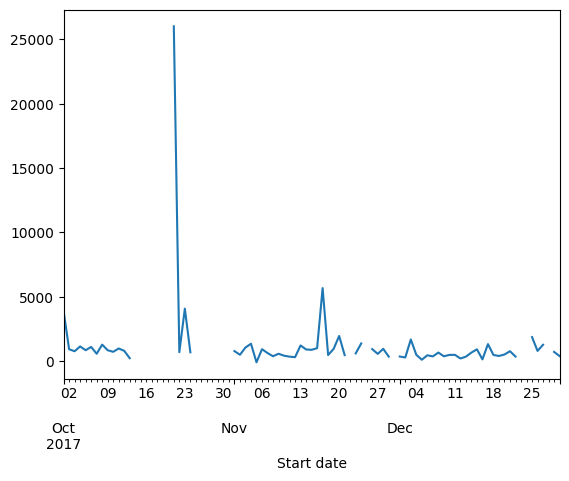

In [122]:
rides\
    .resample("D", on = "Start date")\
    ["Duration seconds"]\
    .mean()\
    .plot()

We can see an oulier which is likely a bike repair